networkx is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. It provides data structures for graphs, digraphs, and multigraphs, as well as many standard graph algorithms.

For instance:

1. nx.Graph(): creates a new undirected graph.
2. nx.DiGraph(): creates a new directed graph.
3. nx.draw(G, ...): draws the graph G using matplotlib.

Check out: https://networkx.org/documentation/stable/tutorial.html

In [ ]:
# Example Adjacency Matrix
# Define your graph as an adjacency matrix where `float('inf')` represents no direct edge
graph = [
    [0, 4, 2, float('inf'), float('inf')],  # Edges from A
    [float('inf'), 0, 3, 2, 3],  # Edges from B
    [float('inf'), 1, 0, 4, 5],  # Edges from C
    [float('inf'), float('inf'), float('inf'), 0, float('inf')],  # Edges from D
    [float('inf'), float('inf'), float('inf'), 1, 0]  # Edges from E
]

## Dijkstra's Algorithm

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Define a function that calculates the shortest paths from a start vertex using Dijkstra's algorithm
# and then plots the graph showing these paths.
def dijkstra_adj_matrix_and_plot(matrix, start):
    # Determine the number of vertices in the graph based on the length of the adjacency matrix
    num_vertices = len(matrix)
    # Initialize distances from start to all vertices as infinity, except for the start vertex itself
    distances = [float('infinity')] * num_vertices
    distances[start] = 0
    # Track which vertices have been visited
    visited = [False] * num_vertices
    # Track the previous vertex for each vertex in the path
    previous = [None] * num_vertices

    # This list will store tuples of the form (current_vertex, neighbor, new_distance)
    # to log updates for each iteration
    updates = []

    # Initialize a directed graph
    G = nx.DiGraph()
    # Add nodes and edges to the graph based on the adjacency matrix
    for i in range(num_vertices):
        G.add_node(i)  # Add graph nodes
        for j in range(num_vertices):
            # Add an edge if the weight is not infinity (meaning the edge/connection exists)
            if matrix[i][j] != float('inf'):
                G.add_edge(i, j, weight=matrix[i][j])

    # Dijkstra's algorithm: iterate over all vertices
    for _ in range(num_vertices):
        # Find the unvisited vertex with the smallest tentative distance
        current_vertex = min((v for v in range(num_vertices) if not visited[v]), #This is a generator expression that iterates over all vertex indices and yields those that have not been visited yet.
                             key=lambda v: distances[v], #The lambda function takes a vertex index v as input and returns its corresponding distance from the start vertex.
                             #This returned value is used by the min function to determine which vertex has the smallest distance.
                             default=None) #If the generator expression does not yield any values (meaning all vertices have been visited), min will return None.



        # If there are no more vertices to visit, break from the loop
        if current_vertex is None:
            break
        # Mark the current vertex as visited
        visited[current_vertex] = True

        # Update the tentative distances to the neighboring vertices
        for neighbor in range(num_vertices):
            if matrix[current_vertex][neighbor] != float('inf') and not visited[neighbor]:
                new_distance = distances[current_vertex] + matrix[current_vertex][neighbor]
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    previous[neighbor] = current_vertex
                    updates.append((current_vertex, neighbor, distances[neighbor]))

    # Convert the list of updates to a DataFrame for easy visualization
    updates_df = pd.DataFrame(updates, columns=['Current Vertex', 'Neighbor', 'New Distance'])
    print(updates_df)

    # Position nodes using the spring layout algorithm, which tries to position the nodes in two-dimensional space
    # so that all the edges are of more or less equal length and there are as few crossing edges as possible
    pos = nx.spring_layout(G)
    plt.figure(figsize=(5, 5))
    # Create a mapping of node indices to labels (A, B, C, ...)
    node_labels = {i: chr(65 + i) for i in range(len(matrix))}

    # Draw the nodes of the graph, with labels and customized appearance
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', edge_color='gray', labels=node_labels)
    # Retrieve the weight labels for each edge in the graph
    labels = nx.get_edge_attributes(G, 'weight')
    # Draw the edge labels on the graph
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Plotting: Highlight the shortest path from the start vertex to all other vertices
    for vertex in range(num_vertices):
        path = []
        # Build the path backwards from each vertex to the start vertex
        while vertex is not None:
            path.append(vertex)
            vertex = previous[vertex]
        # Reverse the path to get the correct order from start to the current vertex
        path.reverse()
        # If the path has more than one vertex, draw the edges in the path
        if len(path) > 1:
            nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i + 1]) for i in range(len(path) - 1)], edge_color='red', width=1)

    plt.title('Graph with Highlighted Shortest Paths from Vertex {}'.format(chr(65+start)))
    plt.axis('off')
    # Display the plot
    plt.show()

    # Return the final distances and the previous vertex in the shortest path for each vertex
    return distances, previous

   Current Vertex  Neighbor  New Distance
0               0         1             4
1               0         2             2
2               2         1             3
3               2         3             6
4               2         4             7
5               1         3             5
6               1         4             6


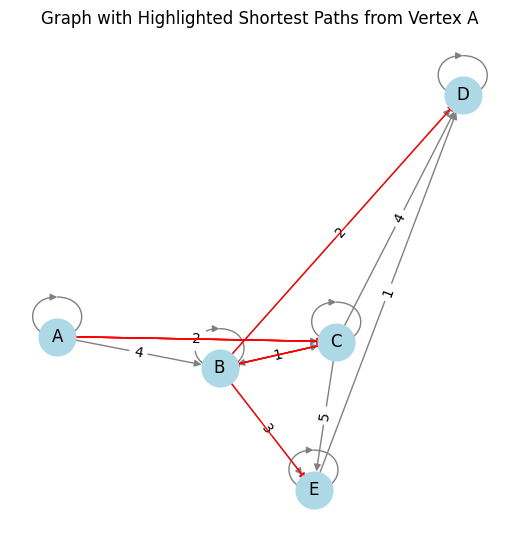


Final Distances: [0, 3, 2, 5, 6]


In [ ]:
# Solve
distances, previous = dijkstra_adj_matrix_and_plot(graph, 0)
print("\nFinal Distances:", distances)
#print("Previous Vertices:", previous)

### Negative Weights


   Current Vertex  Neighbor  New Distance
0               0         1             4
1               0         2             2
2               2         1             3
3               2         3             6
4               2         4             7
5               1         3             5
6               1         4             6


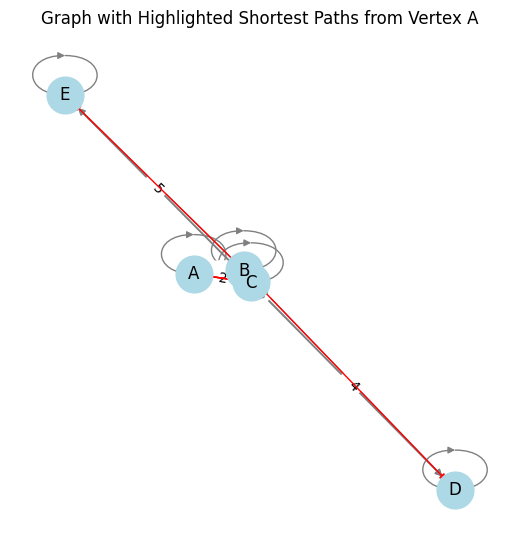


Final Distances: [0, 3, 2, 5, 6]


In [ ]:
graph_neg = [
    [0, 4, 2, float('inf'), float('inf')],  # Edges from A
    [float('inf'), 0, 3, 2, 3],  # Edges from B
    [float('inf'), 1, 0, 4, 5],  # Edges from C
    [float('inf'), float('inf'), float('inf'), 0, float('inf')],  # Edges from D
    [float('inf'), float('inf'), float('inf'), -3, 0]  # Edges from E -- E TO D WEIGHT CHANGED
]
# Solve
distances, previous = dijkstra_adj_matrix_and_plot(graph_neg, 0)
print("\nFinal Distances:", distances)

## Bellman Ford

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

def bellman_ford_and_plot(matrix, start):
    """
    Function that calculates the shortest paths from a start vertex using the Bellman-Ford algorithm
    and then plots the graph showing these paths.

    :param matrix: The adjacency matrix representation of the graph
    :param start: The index of the starting vertex
    :return: A tuple containing the distances from the start vertex and the previous vertices in the path
    """
    num_vertices = len(matrix)
    # Initialize distances from start to all vertices as infinity, except for the start vertex itself
    distances = [float('infinity')] * num_vertices
    distances[start] = 0
    # Track the previous vertex for each vertex in the path
    previous = [None] * num_vertices

    # Initialize a directed graph
    G = nx.DiGraph()
    # Add nodes and edges to the graph based on the adjacency matrix
    for i in range(num_vertices):
        G.add_node(i)
        for j in range(num_vertices):
            if matrix[i][j] != float('inf'):
                G.add_edge(i, j, weight=matrix[i][j])

    # Bellman-Ford algorithm: Relax edges repeatedly
    # 'Relaxation': trying to lower the cost of getting to a vertex by using another vertex.
    for _ in range(num_vertices - 1):
        for u in range(num_vertices):
            for v in range(num_vertices):
                if matrix[u][v] != float('inf'):
                    if distances[u] + matrix[u][v] < distances[v]:
                        distances[v] = distances[u] + matrix[u][v]
                        previous[v] = u

    # Check for negative weight cycles - i.e. relax one more time
    for u in range(num_vertices):
        for v in range(num_vertices):
            if matrix[u][v] != float('inf'):
                if distances[u] + matrix[u][v] < distances[v]:
                    print("Graph contains a negative weight cycle")
                    return None

    # Position nodes using the spring layout algorithm
    pos = nx.spring_layout(G)
    plt.figure(figsize=(5, 5))
    node_labels = {i: chr(65 + i) for i in range(num_vertices)}

    # Draw the nodes of the graph
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', edge_color='gray', labels=node_labels)
    # Draw the edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Plotting: Highlight the shortest paths calculated by the Bellman-Ford algorithm
    for vertex, prev in enumerate(previous):
        if prev is not None:
            nx.draw_networkx_edges(G, pos, edgelist=[(prev, vertex)], edge_color='red', width=2)

    plt.title('Graph with Highlighted Shortest Paths from Vertex {}'.format(chr(65+start)))
    plt.axis('off')
    plt.show()

    return distances, previous


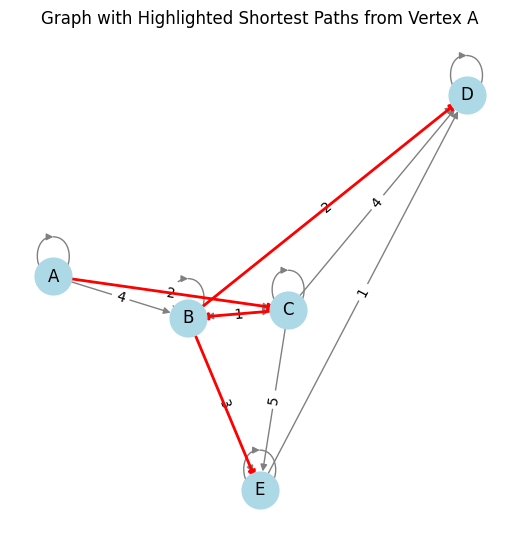

([0, 3, 2, 5, 6], [None, 2, 0, 1, 1])

In [ ]:
bellman_ford_and_plot(graph, 0)

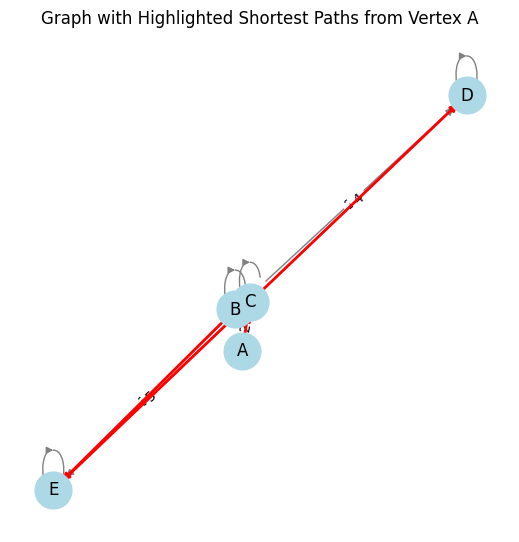

([0, 3, 2, 3, 6], [None, 2, 0, 4, 1])

In [ ]:
bellman_ford_and_plot(graph_neg, 0)

## Alternate forms of defining a graph

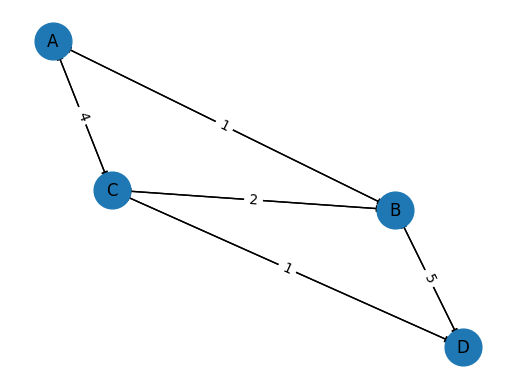

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph
graph_data = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}

# Create a directed graph from graph_data
G = nx.DiGraph()

# Add nodes and edges to the graph
for node, edges in graph_data.items():
    G.add_node(node)
    for edge, weight in edges:
        G.add_edge(node, edge, weight=weight)

# Position nodes using the spring layout
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Draw the edges
nx.draw_networkx_edges(G, pos)

# Label nodes
nx.draw_networkx_labels(G, pos)

# Edge labels
edge_labels = dict([((u, v,), d['weight'])
                    for u, v, d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.axis('off')  # Turn off the axis
plt.show()


In [ ]:
def dijkstra(graph, start):
    """
    Finds the shortest paths from the start vertex to all other vertices in a given graph
    without using a priority queue (heap), with verbose output to show the algorithm's progress.

    :param graph: A dictionary where keys are vertex names, and values are lists of
                  (neighbor, weight) tuples.
    :param start: The starting vertex.
    :return: Two dictionaries containing the shortest distance from the start vertex
             to each vertex, and the "previous" vertex in the shortest path.
    """
    # Initialize distances with infinity, except for the start node
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0

    # Track vertices that have been visited
    visited = {vertex: False for vertex in graph}

    # Track the path
    previous = {vertex: None for vertex in graph}

    vertices = set(graph.keys())

    print(f"Initial distances: {distances}")
    print(f"Initial previous: {previous}\n")

    while vertices:
        current_vertex = None
        # Find the unvisited vertex with the smallest distance
        for vertex in vertices:
            if not visited[vertex] and (current_vertex is None or distances[vertex] < distances[current_vertex]):
                current_vertex = vertex

        if current_vertex is None:
            break  # All vertices visited or remaining vertices are unreachable

        print(f"Processing vertex: {current_vertex}")

        # Mark the current vertex as visited
        visited[current_vertex] = True
        vertices.remove(current_vertex)

        for neighbor, weight in graph[current_vertex]:
            if not visited[neighbor]:
                new_distance = distances[current_vertex] + weight
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    previous[neighbor] = current_vertex
                    print(f"Updated distance for {neighbor} to {new_distance} via {current_vertex}")

        print(f"Updated distances: {distances}")
        print(f"Updated previous: {previous}\n")

    return distances, previous


In [ ]:
distances_no_heap, previous_no_heap = dijkstra(graph_data, 'A')

Initial distances: {'A': 0, 'B': inf, 'C': inf, 'D': inf}
Initial previous: {'A': None, 'B': None, 'C': None, 'D': None}

Processing vertex: A
Updated distance for B to 1 via A
Updated distance for C to 4 via A
Updated distances: {'A': 0, 'B': 1, 'C': 4, 'D': inf}
Updated previous: {'A': None, 'B': 'A', 'C': 'A', 'D': None}

Processing vertex: B
Updated distance for C to 3 via B
Updated distance for D to 6 via B
Updated distances: {'A': 0, 'B': 1, 'C': 3, 'D': 6}
Updated previous: {'A': None, 'B': 'A', 'C': 'B', 'D': 'B'}

Processing vertex: C
Updated distance for D to 4 via C
Updated distances: {'A': 0, 'B': 1, 'C': 3, 'D': 4}
Updated previous: {'A': None, 'B': 'A', 'C': 'B', 'D': 'C'}

Processing vertex: D
Updated distances: {'A': 0, 'B': 1, 'C': 3, 'D': 4}
Updated previous: {'A': None, 'B': 'A', 'C': 'B', 'D': 'C'}



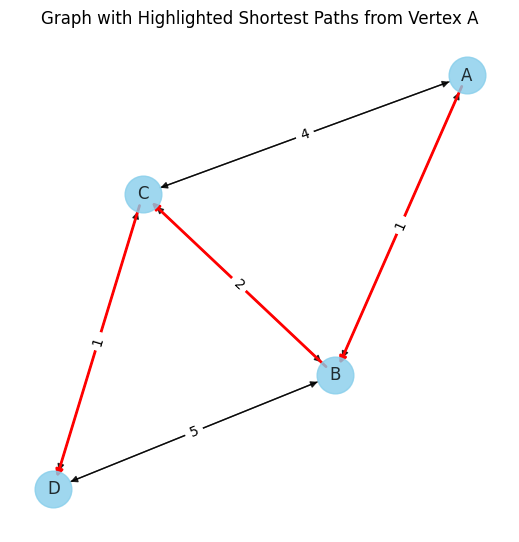

  vertex                           distances  \
0      A  {'A': 0, 'B': 1, 'C': 4, 'D': inf}   
1      B    {'A': 0, 'B': 1, 'C': 3, 'D': 6}   
2      C    {'A': 0, 'B': 1, 'C': 3, 'D': 4}   
3      D    {'A': 0, 'B': 1, 'C': 3, 'D': 4}   

                                     previous  
0  {'A': None, 'B': 'A', 'C': 'A', 'D': None}  
1   {'A': None, 'B': 'A', 'C': 'B', 'D': 'B'}  
2   {'A': None, 'B': 'A', 'C': 'B', 'D': 'C'}  
3   {'A': None, 'B': 'A', 'C': 'B', 'D': 'C'}  


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def dijkstra_log(graph, start):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    previous = {vertex: None for vertex in graph}
    vertices = set(graph.keys())

    log = []  # To log each step's details

    while vertices:
        current_vertex = min(vertices, key=lambda vertex: distances[vertex] if vertex in vertices else float('infinity'))

        if distances[current_vertex] == float('infinity'):
            break

        vertices.remove(current_vertex)

        for neighbor, weight in graph[current_vertex]:
            new_distance = distances[current_vertex] + weight
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = current_vertex

        # Logging the current state
        log.append({
            "vertex": current_vertex,
            "distances": distances.copy(),
            "previous": previous.copy()
        })

    return distances, previous, log

def visualize_graph(graph, log, start):
    G = nx.DiGraph()
    for node, edges in graph.items():
        for edge, weight in edges:
            G.add_edge(node, edge, weight=weight)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(5, 5))

    # Draw the network
    nx.draw(G, pos, edge_color='black', with_labels=True, node_color='skyblue', alpha=0.8, node_size=700)

    # Highlight the shortest paths
    for node, prev in log[-1]['previous'].items():
        if prev is not None:
            nx.draw_networkx_edges(G, pos, edgelist=[(prev, node)], edge_color='red', width=2)

    # Labels for edge weights
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title('Graph with Highlighted Shortest Paths from Vertex {}'.format(start))
    plt.axis('off')
    plt.show()

# Define your graph here
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}

distances, previous, log = dijkstra_log(graph, 'A')
visualize_graph(graph, log, 'A')

# Optionally, convert log to DataFrame for tabular display
df_log = pd.DataFrame(log)
print(df_log[['vertex', 'distances', 'previous']])
